<a href="https://colab.research.google.com/github/serafdavids/Pemograman-dasar/blob/main/LATIHAN09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import pandas as pd

df = pd.read_csv('/products.csv')
display(df.head())

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [4]:
df.describe()

,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


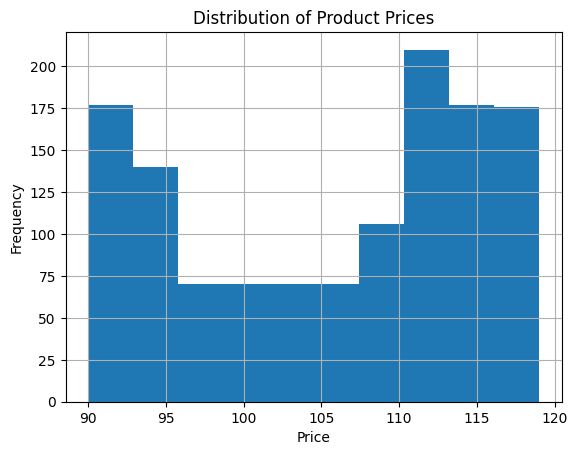

In [6]:
import matplotlib.pyplot as plt

df['price'].hist()
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [7]:
#Korelasi
corr_matrix = df[['price', 'quantity']].corr()
print("Correlation Matrix:", corr_matrix)

Correlation Matrix:              price  quantity
price     1.000000  0.062436
quantity  0.062436  1.000000


In [8]:
#Kovarian
cov_matrix = df[['price', 'quantity']].cov()
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
               price    quantity
price     94.393089    7.086877
quantity   7.086877  136.487597


In [9]:
# Menambah kolom kategori berdasarkan 'quantity'
df['Kategori_Orders'] = df['quantity'].apply(lambda x: 'Banyak' if x >= 60 else 'Sedikit')

print("DataFrame with Kategori_Orders:")
display(df.head())

# Menghitung mean 'quantity' berdasarkan kategori
group_mean = df.groupby('Kategori_Orders')['quantity'].mean()
print("\nMean quantity by Kategori_Orders:")
print(group_mean)

# Agregasi 'quantity' berdasarkan kategori
group_agg = df.groupby('Kategori_Orders').agg({
    'quantity': ['mean', 'count']
})
print("\nAggregated quantity by Kategori_Orders:")
display(group_agg)

DataFrame with Kategori_Orders:


,product_id,product_type,product_name,size,colour,price,quantity,description,Kategori_Orders
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",Banyak
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",Sedikit
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",Sedikit
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt",Banyak
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",Sedikit



Mean quantity by Kategori_Orders:
Kategori_Orders
Banyak     69.817352
Sedikit    49.696223
Name: quantity, dtype: float64

Aggregated quantity by Kategori_Orders:


quantity      
                      mean count
Kategori_Orders                 
Banyak           69.817352   657
Sedikit          49.696223   609